## <center>Universidade do Estado do Amazonas</center>
#### <center>Escola Superior de Tecnologia</center>
##### <center>Pós-graduação Lato Sensu em Ciência de Dados</center>
##### <center>Aquisição, Pré-Processamento e Exploração de Dados (Turma 02)</center>
---
## <center>Trabalho Final</center>
##### <center>Professor: <a href="" target="_blank">PhD. LUIS CUEVAS RODRIGUEZ</a></center>
###### <center>Equipe 3**: Daniel Soares, Leonardo Rocha, Klemerson Castro e Heryck Michael Corrêa</center>

# **1. Objetivo**

Trabalho final de curso com o objetivo de utilizar as técnicas de Ciência de Dados para responder questões interessantes para um Negócio aplicando as técnicas de Coleta de Dados, aplicar métodos de pré-processamento de dados, explorar os dados e responder as questões definidas pela Equipe 

### **1.1. Pergunta Chave do Negócio** 
**A.** Existe relação entre o volume de pesquisas sobre termos referente ao Covid-19 no Google e os novos casos de covid no Brasil e Amazonas?

**B.** Avaliar se os dados disponibilizados pelo Google Trends, relacionado com o Corona Virus podem ser usados por planejadores de políticas públicas para relacionar as pesquisas realizadas com os dados oficiais do Governo.

### **1.2. Introdução**

Quando adoecemos, muitos de nós recorremos ao Google para entender nossos sintomas e opções de tratamento. As buscas online por informações médicas cresceram junto com a taxa de acesso à internet, que hoje chega a 59% em todo o mundo . Começando com o exame de surtos de gripe , os pesquisadores descobriram que a atividade de pesquisa do Google muitas vezes imita a carga real de doenças. Além disso, como as pessoas pesquisam online por informações sobre os sintomas antes (ou em vez de) acessar o atendimento médico, a atividade de pesquisa online dos sintomas pode preceder os surtos de doenças observados . Isso significa que a atividade de pesquisa pode potencialmente usado como um sistema de alerta precoce. Os alertas precoces podem ajudar governos e profissionais de saúde a mobilizar recursos e se preparar para responder - o que é particularmente crucial durante a pandemia COVID-19.
Muitas pesquisas disponiveis na internet mostraram que a atividade de pesquisa do Google está correlacionada com a incidência de várias outras doenças, incluindo dengue, diabetes , Ebola , Zika, entre outras.

---

### Clonando repositório do github (Para leitura dos dados)

In [7]:
! git clone https://github.com/Klemersoncastro/google_trends_covid
%cd google_trends_covid/dados

fatal: destination path 'google_trends_covid' already exists and is not an empty directory.
/content/google_trends_covid/dados


#### Instalando pacotes

In [8]:
! pip install pytrends

#### Importando as bibliotecas

In [9]:
import pandas as pd
import time
from pytrends.request import TrendReq
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# **2 -  Coletando os dados**

### **2.1 - Coletando os dados dos casos de Covid-19**

In [10]:
#Lendo base de dados do covid
df_covid = pd.read_csv('casos_covid.csv', index_col=0)

In [11]:
df_covid

,date,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1,2020-03-17,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0000,0,1,state,AC,3,0
3,2020-03-18,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0000,0,2,state,AC,0,0
5,2020-03-19,894470.0,881935.0,False,False,4,0.44719,2020-03-19,0.0000,0,3,state,AC,1,0
7,2020-03-20,894470.0,881935.0,False,False,7,0.78259,2020-03-20,0.0000,0,4,state,AC,3,0
9,2020-03-21,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0000,0,5,state,AC,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655203,2021-02-25,46289333.0,45919049.0,False,False,2014529,4352.03722,2021-02-25,0.0292,58873,367,state,SP,11889,345
1655850,2021-02-26,46289333.0,45919049.0,False,False,2026125,4377.08835,2021-02-26,0.0292,59129,368,state,SP,11596,256
1656497,2021-02-27,46289333.0,45919049.0,False,False,2037267,4401.15869,2021-02-27,0.0292,59428,369,state,SP,11142,299
1657144,2021-02-28,46289333.0,45919049.0,False,False,2041628,4410.57986,2021-02-28,0.0291,59493,370,state,SP,4361,65


### **2.2 - Coletando as trends de volume de pesquisa sobre os sintomas de covid-19**

In [12]:
pytrends = TrendReq()

In [13]:
# Definindo palavras chaves
list_keywords = ['covid','coronavirus','falta de ar','febre','tosse','perda paladar','perda olfato']

#### **2.2.1 - Coletando as trends semanais do Brasil**

In [15]:
'''
Função:
  - Retorna um dataframe com as trends de todas as palavras passadas como parâmetro em list_keywords.
Parâmetros:
  Serão repassados para a função pytrends.build_payload()
  - list_keywords: Lista de palavras chaves para a coleta das trends.
  - timeframe: Intervalo para a coleta das trends
  - geo: Localização da pesquisa
'''
def get_trends(list_keywords, timeframe, geo) :
  list_dataframe_trends = [] 
  # Coleta as trends de cada uma das palavras e os guarda em uma lista de dataframes (cada trend de uma palavra é um dataframe).
  for keyword in list_keywords :
    pytrends.build_payload(kw_list=[keyword], timeframe=timeframe, geo=geo, gprop='')
    df_trends_keyword = pytrends.interest_over_time()
    list_dataframe_trends.append(df_trends_keyword)
    print(keyword)
    time.sleep(3)

  # Concatenando os dataframes de cada palavra/trend em um único dataframe
  df_trends = list_dataframe_trends.pop(0)
  for df_trend in list_dataframe_trends :
    df_trends = pd.concat([df_trends, df_trend], axis=1)
  #df_trends.drop(columns=['isPartial'], inplace=True)

  # Renomeando o nome das colunas
  df_trends.columns = df_trends.columns.str.replace(' ','_')

  return df_trends.reset_index()

In [16]:
# Coletando as trends semanais
df_trendsSemanal_br = get_trends(list_keywords, '2020-01-01 2021-02-27', 'BR')

covid
coronavirus
falta de ar
febre
tosse
perda paladar
perda olfato


In [17]:
# Removendo colunas isPartial
df_trendsSemanal_br.drop(columns=['isPartial'], inplace=True)

In [18]:
# Visualizando as trends semanais do Brasil
df_trendsSemanal_br.iloc[[0,1,2,3,4,-5,-4,-3,-2,-1]]

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato
0,2020-01-05,0,0,23,36,28,3,2
1,2020-01-12,0,0,24,37,26,2,1
2,2020-01-19,0,4,23,49,23,3,0
3,2020-01-26,0,14,22,41,24,2,1
4,2020-02-02,0,5,22,39,25,3,0
55,2021-01-24,76,2,27,40,25,47,38
56,2021-01-31,69,2,28,40,26,30,29
57,2021-02-07,65,2,24,38,26,28,29
58,2021-02-14,71,3,29,42,30,31,31
59,2021-02-21,94,3,30,47,33,36,38


#### **2.2.2 - Coletando as trends diárias do Brasil**

In [19]:
# Coletando as trends diárias do Brasil e Amazonas(coleta de até 8 meses para vir de forma diária, ou seja, dividindo a coleta em duas partes.)

#df_trendsDiario_br_parte1 = get_trends(list_keywords, '2020-01-01 2020-06-30', 'BR')
df_trendsDiario_br = get_trends(list_keywords, '2020-07-01 2021-02-28', 'BR')

covid
coronavirus
falta de ar
febre
tosse
perda paladar
perda olfato


In [20]:
# Concatenando os dois perios das trends diárias
# df_trendsDiario_br = pd.concat([df_trendsDiario_br_parte1, df_trendsDiario_br_parte2], axis=0)

In [21]:
# Removendo algumas colunas desnecessárias
df_trendsDiario_br.drop(columns=['isPartial'], inplace=True)

In [22]:
# Visualizando as trends diárias do Brasil
df_trendsDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato
0,2020-07-01,69,73,73,74,52,27,54
1,2020-07-02,69,69,58,71,69,32,36
2,2020-07-03,72,73,83,65,48,48,49
3,2020-07-04,68,70,82,73,71,100,55
4,2020-07-05,67,70,92,63,66,35,32
...,...,...,...,...,...,...,...,...
238,2021-02-24,81,20,53,80,77,82,49
239,2021-02-25,84,23,54,80,79,24,19
240,2021-02-26,96,25,64,86,76,38,18
241,2021-02-27,100,25,68,94,90,19,44


---

# **3 - Organizando os dataframes**

### **3.1 - Juntando as Trends e os Casos de Covid-19 no mesmo dataframe <br> Casos diários**

In [23]:
# Agrupando os casos de covid por dia / casos diários
df_covidDiario_br = df_covid.groupby(by=['date']).sum().reset_index()[['date','new_confirmed','new_deaths']]

In [24]:
# Visualizando os campos selecionados dos casos de covid
df_covidDiario_br

,date,new_confirmed,new_deaths
0,2020-02-25,1,0
1,2020-02-26,0,0
2,2020-02-27,0,0
3,2020-02-28,1,0
4,2020-02-29,0,0
...,...,...,...
366,2021-02-25,68141,1576
367,2021-02-26,63530,1340
368,2021-02-27,58418,1252
369,2021-02-28,33288,772


In [25]:
# Mudando as datas dos casos de covid para o tipo date
df_covidDiario_br['date'] = pd.to_datetime(df_covidDiario_br['date'])

In [26]:
# Juntando as trends com os casos de covid no mesmo dataframe
df_casosDiario_br = df_trendsDiario_br.merge(df_covidDiario_br, how='outer', on='date')

In [27]:
# Visualiazando a junção entre as Trends de volume de pesquisa e os casos de covid no Brasil
df_casosDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato,new_confirmed,new_deaths
0,2020-07-01,69.0,73.0,73.0,74.0,52.0,27.0,54.0,46825,1086
1,2020-07-02,69.0,69.0,58.0,71.0,69.0,32.0,36.0,44401,1259
2,2020-07-03,72.0,73.0,83.0,65.0,48.0,48.0,49.0,42854,1213
3,2020-07-04,68.0,70.0,82.0,73.0,71.0,100.0,55.0,33297,1061
4,2020-07-05,67.0,70.0,92.0,63.0,66.0,35.0,32.0,25648,555
...,...,...,...,...,...,...,...,...,...,...
366,2020-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36920,1031
367,2020-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32850,583
368,2020-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21582,731
369,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39681,1318


In [ ]:
# Removendo linhas que possuem trends nulas
df_casosDiario_br = df_casosDiario_br.dropna(axis=0, how='any')

In [29]:
df_casosDiario_br.loc[:, ('covid','coronavirus','falta_de_ar','febre','tosse','perda_paladar','perda_olfato')] = df_casosDiario_br.loc[:, ('covid','coronavirus','falta_de_ar','febre','tosse','perda_paladar','perda_olfato')].astype(int).copy()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [31]:
df_casosDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato,new_confirmed,new_deaths
0,2020-07-01,69,73,73,74,52,27,54,46825,1086
1,2020-07-02,69,69,58,71,69,32,36,44401,1259
2,2020-07-03,72,73,83,65,48,48,49,42854,1213
3,2020-07-04,68,70,82,73,71,100,55,33297,1061
4,2020-07-05,67,70,92,63,66,35,32,25648,555
...,...,...,...,...,...,...,...,...,...,...
238,2021-02-24,81,20,53,80,77,82,49,65387,1446
239,2021-02-25,84,23,54,80,79,24,19,68141,1576
240,2021-02-26,96,25,64,86,76,38,18,63530,1340
241,2021-02-27,100,25,68,94,90,19,44,58418,1252


### **3.2 - Juntando as Trends e os casos de Covid-19 no mesmo dataframe <br> Casos semanais**

In [32]:
# Visualizando os casos de diário do Brasil
df_trendsSemanal_br.iloc[[0,1,2,3,4,-5,-4,-3,-2,-1]]

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato
0,2020-01-05,0,0,23,36,28,3,2
1,2020-01-12,0,0,24,37,26,2,1
2,2020-01-19,0,4,23,49,23,3,0
3,2020-01-26,0,14,22,41,24,2,1
4,2020-02-02,0,5,22,39,25,3,0
55,2021-01-24,76,2,27,40,25,47,38
56,2021-01-31,69,2,28,40,26,30,29
57,2021-02-07,65,2,24,38,26,28,29
58,2021-02-14,71,3,29,42,30,31,31
59,2021-02-21,94,3,30,47,33,36,38


In [33]:
'''
Função para agrupar os casos de covid por semana de acordo com as mesmas semanas das trends.
Parâmetros:
  df_casosDiarioCovid: dataframe de casos de covid diário com as colunas |date|new_confirmed|new_death
  df_trendSemanal: dataframe com as trends semanais.
Return:
  Retorna um dataframe já com as trends e casos de covid juntas. Por semana.
'''
def agruparCasosCovidPorSemana(df_casosDiarioCovid, df_trendSemanal) :
  list_dict_covid_casosPorSemana = []
  data_primeiro_caso_covid = df_casosDiarioCovid['date'].min()
  for data in df_trendSemanal['date'] :
    if pd.to_datetime(data) < pd.to_datetime(data_primeiro_caso_covid) :
      list_dict_covid_casosPorSemana.append({'date':data, 'new_confirmed':0, 'new_deaths':0})
    else :
      list_dict_covid_casosPorSemana.append(
          {'date': data, 
          'new_confirmed': df_casosDiarioCovid[(df_casosDiarioCovid['date']>=pd.to_datetime(data)) & (df_casosDiarioCovid['date']<=pd.to_datetime(data)+timedelta(days=6))]['new_confirmed'].sum(),
          'new_deaths': df_casosDiarioCovid[(df_casosDiarioCovid['date']>=pd.to_datetime(data)) & (df_casosDiarioCovid['date']<=pd.to_datetime(data)+timedelta(days=6))]['new_deaths'].sum()
          }
      )
  return pd.DataFrame(list_dict_covid_casosPorSemana)

In [34]:
# Agrupando os casos de covid por semana de acordo com as semanas das trends
df_covidSemanal_br = agruparCasosCovidPorSemana(df_covidDiario_br, df_trendsSemanal_br)

In [35]:
# Visualizando as 4 primeiras e últimas semanas dos casos de covid
df_covidSemanal_br.iloc[[0,1,2,3,-4,-3,-2,-1]]

,date,new_confirmed,new_deaths
0,2020-01-05,0,0
1,2020-01-12,0,0
2,2020-01-19,0,0
3,2020-01-26,0,0
56,2021-01-31,322189,7116
57,2021-02-07,314475,7573
58,2021-02-14,327047,7345
59,2021-02-21,380391,8290


In [37]:
# Juntando as trends de volume de pesquisa e os casos de covid semanais 
df_casosSemanal_br = df_trendsSemanal_br.merge(df_covidSemanal_br, how='inner', on='date')

In [38]:
# Visualizando as 4 primeiras e últimas semanas das trends e dos casos de covid
df_casosSemanal_br.iloc[[0,1,2,3,-4,-3,-2,-1]]

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato,new_confirmed,new_deaths
0,2020-01-05,0,0,23,36,28,3,2,0,0
1,2020-01-12,0,0,24,37,26,2,1,0,0
2,2020-01-19,0,4,23,49,23,3,0,0,0
3,2020-01-26,0,14,22,41,24,2,1,0,0
56,2021-01-31,69,2,28,40,26,30,29,322189,7116
57,2021-02-07,65,2,24,38,26,28,29,314475,7573
58,2021-02-14,71,3,29,42,30,31,31,327047,7345
59,2021-02-21,94,3,30,47,33,36,38,380391,8290


# **4 - Normalizando os casos e mortes confirmados de covid**

- Função máximos e mínimos
$$x = \frac{x - min(x)}{max(x)-min(x)}$$

In [39]:
'''
Função para normalizar colunas de um dataframe
Parâmetros:
  min: limite mínimo da normalização
  max: limite máximo da normalização
  dataframe: dataframe que possui os dados que serão normalizados
  colunas: array de str com os nomes das colunas que serão normalizadas
Return:
  retorna um dataframe com as colunas normalizadas
'''
def normalizar(min, max, dataframe, colunas) :
  scaler=MinMaxScaler(feature_range=(min,max))
  scaled_data = scaler.fit_transform(dataframe[colunas])
  list_nome_colunas_normalizadas = []
  df = pd.DataFrame(scaled_data, columns=colunas)
  return df 

In [40]:
df_casosDiario_br[['new_confirmed_n','new_deaths_n']] = normalizar(0, 100, df_casosDiario_br, ['new_confirmed','new_deaths'])
df_casosSemanal_br[['new_confirmed_n','new_deaths_n']] = normalizar(0, 100, df_casosSemanal_br, ['new_confirmed','new_deaths'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
df_casosDiario_br

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato,new_confirmed,new_deaths,new_confirmed_n,new_deaths_n
0,2020-07-01,69,73,73,74,52,27,54,46825,1086,47.320903,65.877437
1,2020-07-02,69,69,58,71,69,32,36,44401,1259,44.347399,77.924791
2,2020-07-03,72,73,83,65,48,48,49,42854,1213,42.449706,74.721448
3,2020-07-04,68,70,82,73,71,100,55,33297,1061,30.726202,64.136490
4,2020-07-05,67,70,92,63,66,35,32,25648,555,21.343229,28.899721
...,...,...,...,...,...,...,...,...,...,...,...,...
238,2021-02-24,81,20,53,80,77,82,49,65387,1446,70.090775,90.947075
239,2021-02-25,84,23,54,80,79,24,19,68141,1576,73.469087,100.000000
240,2021-02-26,96,25,64,86,76,38,18,63530,1340,67.812807,83.565460
241,2021-02-27,100,25,68,94,90,19,44,58418,1252,61.541953,77.437326


In [43]:
# Visualizando trends e casos semanais de covid
df_casosSemanal_br.iloc[[0,1,2,3,-4,-3,-2,-1]]

,date,covid,coronavirus,falta_de_ar,febre,tosse,perda_paladar,perda_olfato,new_confirmed,new_deaths,new_confirmed_n,new_deaths_n
0,2020-01-05,0,0,23,36,28,3,2,0,0,0.000000,0.000000
1,2020-01-12,0,0,24,37,26,2,1,0,0,0.000000,0.000000
2,2020-01-19,0,4,23,49,23,3,0,0,0,0.000000,0.000000
3,2020-01-26,0,14,22,41,24,2,1,0,0,0.000000,0.000000
56,2021-01-31,69,2,28,40,26,30,29,322189,7116,84.699428,85.838359
57,2021-02-07,65,2,24,38,26,28,29,314475,7573,82.671514,91.351025
58,2021-02-14,71,3,29,42,30,31,31,327047,7345,85.976535,88.600724
59,2021-02-21,94,3,30,47,33,36,38,380391,8290,100.000000,100.000000


Salvando os dataframes

In [44]:
df_casosDiario_br.to_csv('/content/Covid + trend diário Brasil.csv')
df_casosSemanal_br.to_csv('/content/Covid + trend semanal Brasil.csv')

# **5 - Correlação entre as trends e os casos de covid**

In [45]:
df_casosDiario_br = df_casosDiario_br[df_casosDiario_br['date']>'2020-07-01']

In [46]:
df_correlacao_trendsDiaria_CasosCovid = df_casosDiario_br.corr(method='pearson')[['new_confirmed','new_deaths']]
df_correlacao_trendsDiaria_CasosCovid

,new_confirmed,new_deaths
covid,0.547608,0.443094
coronavirus,0.040027,0.276526
falta_de_ar,0.146249,0.127889
febre,0.377918,0.304900
tosse,0.282481,0.145714
perda_paladar,0.084132,0.009837
perda_olfato,0.096748,-0.035491
new_confirmed,1.000000,0.845713
new_deaths,0.845713,1.000000
new_confirmed_n,1.000000,0.845713


In [47]:
df_correlacao_trendsSemanal_CasosCovid = df_casosSemanal_br.corr(method='pearson')[['new_confirmed','new_deaths']].iloc[0:9]
df_correlacao_trendsSemanal_CasosCovid

,new_confirmed,new_deaths
covid,0.602781,0.723499
coronavirus,-0.494936,-0.399567
falta_de_ar,-0.308727,-0.144641
febre,-0.428673,-0.347977
tosse,-0.411991,-0.418068
perda_paladar,0.415028,0.583915
perda_olfato,0.399168,0.551223
new_confirmed,1.000000,0.884333
new_deaths,0.884333,1.000000


---

# **6 - Análise dos dados**

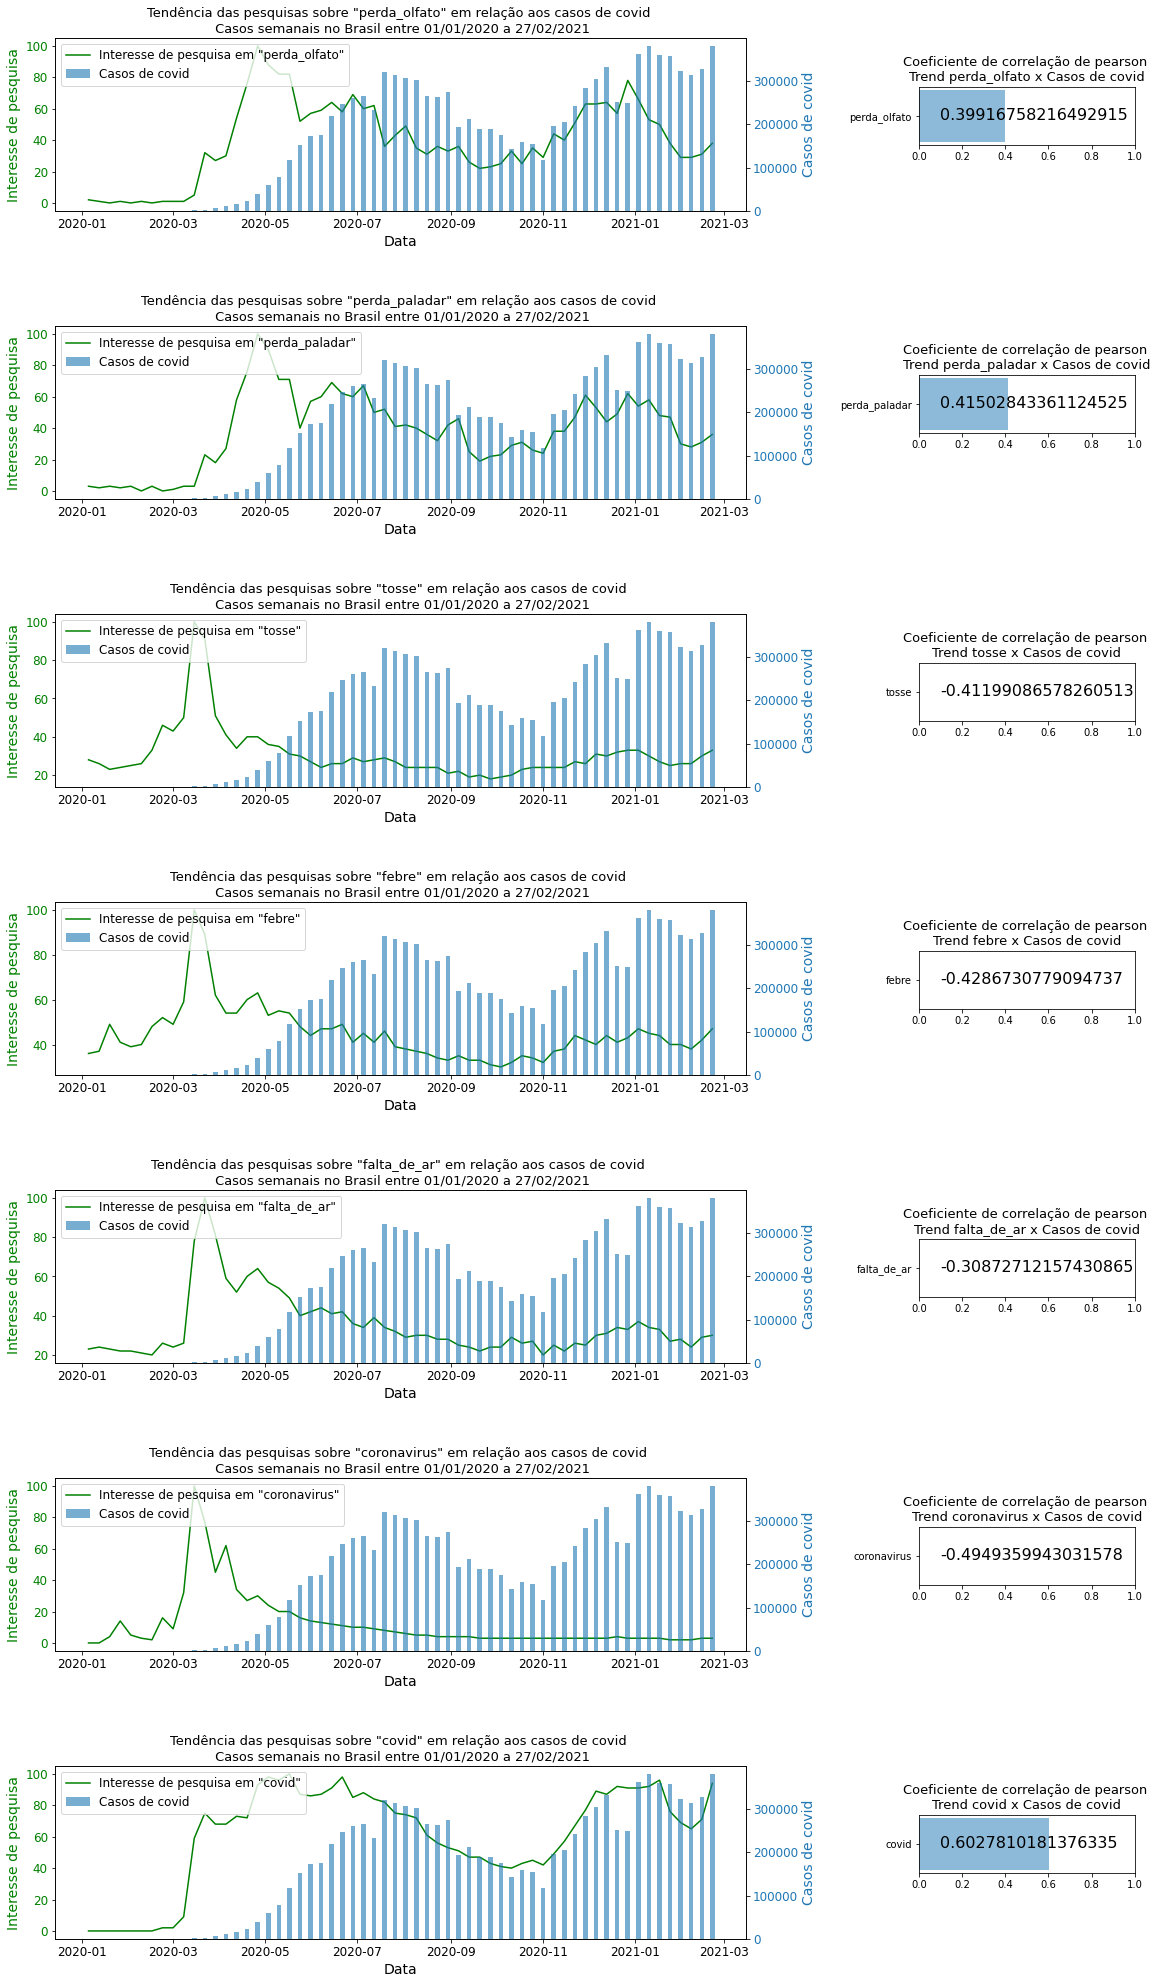

In [48]:
# Mostrando as tendências dos volumes de pesquisa e as correlações com os novos casos de covid
# Casos Semanais no Brasil
keywords = ['covid','coronavirus','falta_de_ar','febre','tosse','perda_paladar','perda_olfato']
i = 1
j = 0
fig = plt.figure()
for keyword in keywords :
  color = 'green'
  ax1 = fig.add_axes([0, 1*i, 1.6, 0.6])
  ax1.set_title('Tendência das pesquisas sobre "' + keyword + '" em relação aos casos de covid \n Casos semanais no Brasil entre 01/01/2020 a 27/02/2021', fontsize=13)
  ax1.plot(df_casosSemanal_br['date'],df_casosSemanal_br[keyword], label='Interesse de pesquisa em "' + keyword + '"', color=color)
  ax1.set_ylabel('Interesse de pesquisa', color=color, fontsize=14)
  ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
  ax1.tick_params(axis='x', which='both', labelsize=12)
  ax1.set_xlabel('Data', fontsize=14)
  
  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.bar(df_casosSemanal_br['date'],df_casosSemanal_br['new_confirmed'], alpha=0.6, label='Casos de covid', color=color, width=3)
  ax2.set_ylabel('Casos de covid', color=color, fontsize=14)
  ax2.tick_params(axis='y', labelcolor=color, labelsize=12)


  lines, labels = ax1.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

  # Gráfico da correlação
  ax_1 = fig.add_axes([2, 1.23+j, 0.5, 0.2])
  ax_1.set_title('Coeficiente de correlação de pearson \nTrend ' +keyword+ ' x Casos de covid', fontsize=13)
  ax_1.barh(df_correlacao_trendsSemanal_CasosCovid.index[j], df_correlacao_trendsSemanal_CasosCovid['new_confirmed'].iloc[j], alpha=0.5)
  ax_1.text(0.1, keyword, df_correlacao_trendsSemanal_CasosCovid['new_confirmed'].iloc[j], fontsize=16, horizontalalignment='left', verticalalignment='center')
  plt.xlim(0,1)
  i = i + 1
  j = j + 1
fig.show()

In [49]:
df_casosDiario_br = df_casosDiario_br[df_casosDiario_br['date']>'2020-07-01']

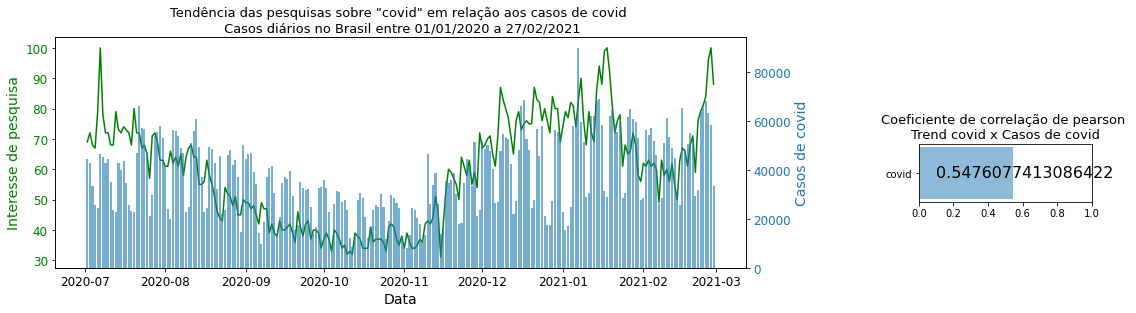

In [50]:
# Mostrando as tendências dos volumes de pesquisa e as correlações com os novos casos de covid
# Casos Diários no Brasil
keywords = ['covid']
i = 1
j = 0
fig = plt.figure()
for keyword in keywords :
  color = 'green'
  ax1 = fig.add_axes([0, 1*i, 1.6, 0.8])
  ax1.set_title('Tendência das pesquisas sobre "' + keyword + '" em relação aos casos de covid \n Casos diários no Brasil entre 01/01/2020 a 27/02/2021', fontsize=13)
  ax1.plot(df_casosDiario_br['date'],df_casosDiario_br[keyword], label='Interesse de pesquisa em "' + keyword + '"', color=color)
  ax1.set_ylabel('Interesse de pesquisa', color=color, fontsize=14)
  ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
  ax1.tick_params(axis='x', which='both', labelsize=12)
  ax1.set_xlabel('Data', fontsize=14)

  ax2 = ax1.twinx()
  color = 'tab:blue'
  ax2.bar(df_casosDiario_br['date'],df_casosDiario_br['new_confirmed'], alpha=0.6, label='Casos de covid', color=color)
  ax2.set_ylabel('Casos de covid', color=color, fontsize=14)
  ax2.tick_params(axis='y', labelcolor=color, labelsize=12)

  #lines, labels = ax1.get_legend_handles_labels()
  #lines2, labels2 = ax2.get_legend_handles_labels()
  #fig.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

  # Gráfico da correlação
  ax_1 = fig.add_axes([2, 1.23+j, 0.4, 0.2])
  ax_1.set_title('Coeficiente de correlação de pearson \nTrend ' +keyword+ ' x Casos de covid', fontsize=13)
  ax_1.barh(df_correlacao_trendsDiaria_CasosCovid.index[j], df_correlacao_trendsDiaria_CasosCovid['new_confirmed'].iloc[j], alpha=0.5)
  ax_1.text(0.1, keyword, df_correlacao_trendsDiaria_CasosCovid['new_confirmed'].iloc[j], fontsize=16, horizontalalignment='left', verticalalignment='center')
  plt.xlim(0,1)
  i = i + 1
  j = j + 1
fig.show()

In [51]:
df_diferenca_dias = pd.DataFrame(
  {'Trend_covid_pico':[df_casosDiario_br[df_casosDiario_br['covid']==df_casosDiario_br[(df_casosDiario_br['date']>'2020-07-01') & (df_casosDiario_br['date']<'2020-08-01')]['covid'].max()]['date'].iloc[0],
                       df_casosDiario_br[df_casosDiario_br['covid']==df_casosDiario_br[(df_casosDiario_br['date']>'2020-12-01') & (df_casosDiario_br['date']<'2021-01-01')]['covid'].max()]['date'].iloc[0]],   
   'Casos_covid_pico':[df_casosDiario_br[df_casosDiario_br['new_confirmed']==df_casosDiario_br[(df_casosDiario_br['date']>'2020-07-01') & (df_casosDiario_br['date']<'2020-08-01')]['new_confirmed'].max()]['date'].iloc[0],
                        df_casosDiario_br[df_casosDiario_br['new_confirmed']==df_casosDiario_br[(df_casosDiario_br['date']>'2020-12-01') & (df_casosDiario_br['date']<'2021-01-01')]['new_confirmed'].max()]['date'].iloc[0]]
  }, index=['Pico_1','Pico_2']
)
df_diferenca_dias['diferenca_dias'] = df_diferenca_dias['Trend_covid_pico'] - df_diferenca_dias['Casos_covid_pico']
df_diferenca_dias

,Trend_covid_pico,Casos_covid_pico,diferenca_dias
Pico_1,2020-07-07,2020-07-22,-15 days
Pico_2,2020-12-08,2020-12-17,-9 days


### Considerações finais
Pelo apresentado pode-se verificar a relação entre as pesquisas de termos relacionados ao Covid-19 no google e os casos registados. 
Pode-se verificar, também, que no Brasil a busca pelo termo Covid-19, apresentou maior correlação, ocorrendo em média de 12 dias. 
Outras pesquisas poderiam ser realizadas para diferente termos para compreender os impactos do COVID-19, por exemplo: 

1.   Na saúde mental: (ansiedade e solidão)
2.   Consequências potenciais: (desemprego e dívidas)
1.   Medidas preventivas: (máscaras faciais e distanciamento social )
2.   Tratamentos: (respiradores, medicamentos, ventiladores).

Verificou-se que os sintomas mais genéricos, como “tosse”, são piores no geral, apresentando baixa correlação, e o termo COVID-19 tende a funcionar bem apresentando alta correlação. 
Pode se concluir que os dados do Google Trends ode ser uma ferrame potencialmente a ser utilizada como um sistema de alerta precoce e podem complementar outras ferramentas de monitoramento para garantir que os legisladores sejam capazes de responder de forma proativa a picos em casos COVID-19.
Outro aspecto os dados do Google Trends podem alertar sobre áreas que podem estar subnotificando casos, baixo número de casos, mas têm alta atividade de pesquisa de sintomas.O exame dessas discrepâncias pode ajudar os governos a compreender as áreas que podem se beneficiar mais de recursos adicionais para teste - e isso pode ser particularmente relevante em países onde muitas regiões enfrentam capacidade limitada de teste.